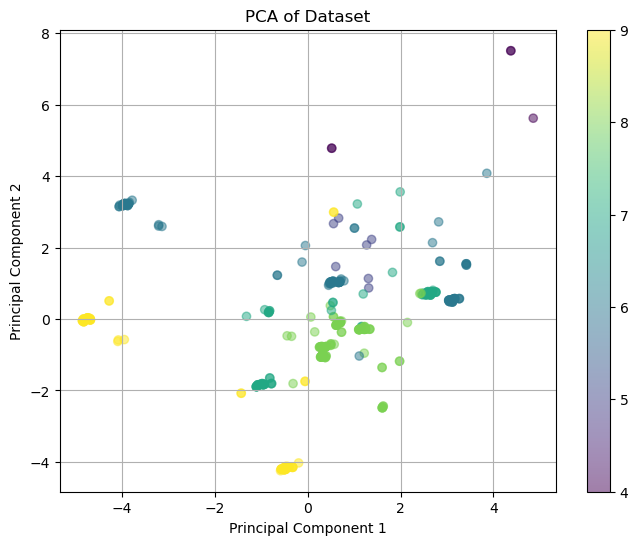

In [1]:
#Linear Regression model
# PROBLEM: 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#Load the dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Handle 'Gender'
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encode
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'], drop_first=True)

X = df.drop(columns=['Quality of Sleep'])
y = df['Quality of Sleep']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Quality of Sleep'], axis=1))

# PCA
pca = PCA(n_components=2)  # 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Quality of Sleep'] = df['Quality of Sleep']

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
                      c=pca_df['Quality of Sleep'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()